# Simple Linear Regression on Salary Data

**Salary_hike ->** Build a prediction model for *Salary_hike*.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [2]:
sal = pd.read_csv('Salary_Data.csv')

#### EDA on dataset

In [3]:
# Check first 5 records
sal.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Check last 5 records
sal.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
# Check for data types, non-null values & memory usage
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
# Get central tendency, dispersion and shape of dataset’s distribution
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# Checking Null values
sal.isnull().sum() * 100 / sal.shape[0]

YearsExperience    0.0
Salary             0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [8]:
# Check for Skewness of all dataset columns
from scipy import stats
print("Skewness of Salary is", stats.skew(sal['Salary']))
print("Skewness of YearsExperience is", stats.skew(sal['YearsExperience']))

Skewness of Salary is 0.3361618825592921
Skewness of YearsExperience is 0.3603123252525561


<font size = 3 color = darkblue>As skewness for both *Salary* and *YearsExperience* is between -0.5 and 0.5, the distribution is approximately symmetric. </font>

In [9]:
# Check for the column labels of the DataFrame
sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
# Check the dimensions of the DataFrame
sal.shape

(30, 2)

In [11]:
# Check for the random sample from the DataFrame
sal.sample(5)

,YearsExperience,Salary
9,3.7,57189.0
27,9.6,112635.0
24,8.7,109431.0
22,7.9,101302.0
28,10.3,122391.0


#### Visualize data

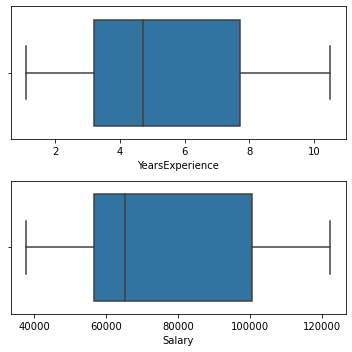

In [12]:
# Check for Outliers in dataset
fig, axs = plt.subplots(2, figsize = (5, 5))
plt1 = sns.boxplot(sal['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(sal['Salary'], ax = axs[1])
plt.tight_layout()

<font size = 3 color = darkblue>There are no outliers present in the data.</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C0A1FD608>,
      dtype=object)

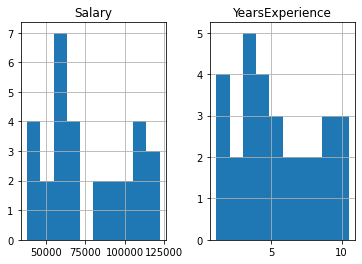

In [13]:
# Check for data normalization using histogram
sal.hist(column = ["YearsExperience", "Salary"])

#### Correlation Analysis

In [14]:
sal.corr(method = 'pearson')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The correlation between Salary and weight gained is high (97.8%)

In [15]:
# Assign data to variables
x = sal['Salary']
y = sal['YearsExperience']

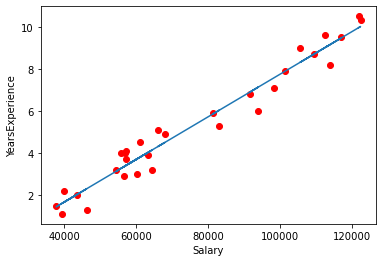

In [16]:
# Create Scatter plot
plt.scatter(x, y, color = 'red')

# m = slope, b = intercept
m, b = np.polyfit(x, y, 1)

# Add line of best fit
plt.plot(x, m*x + b)
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

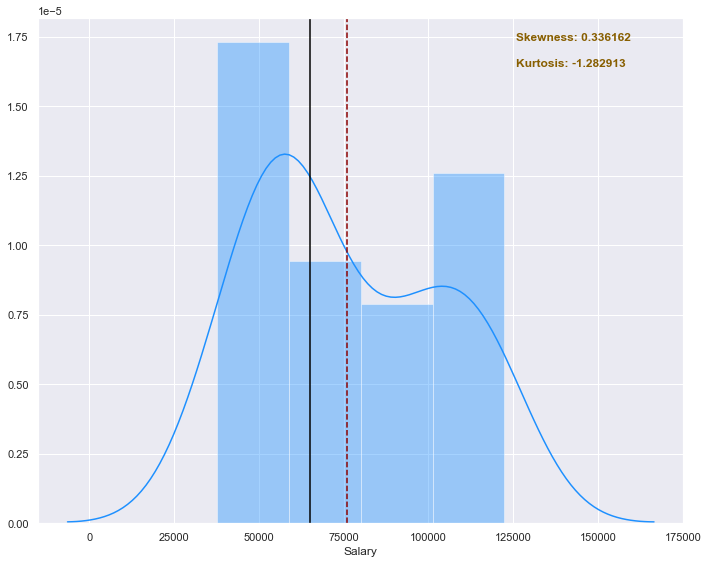

In [17]:
sns.set(color_codes = True)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

sns.distplot(x, color = "dodgerblue")
plt.axvline(np.mean(x), color = 'darkred', linestyle = '--')
plt.axvline(np.median(x), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()

plt.show()

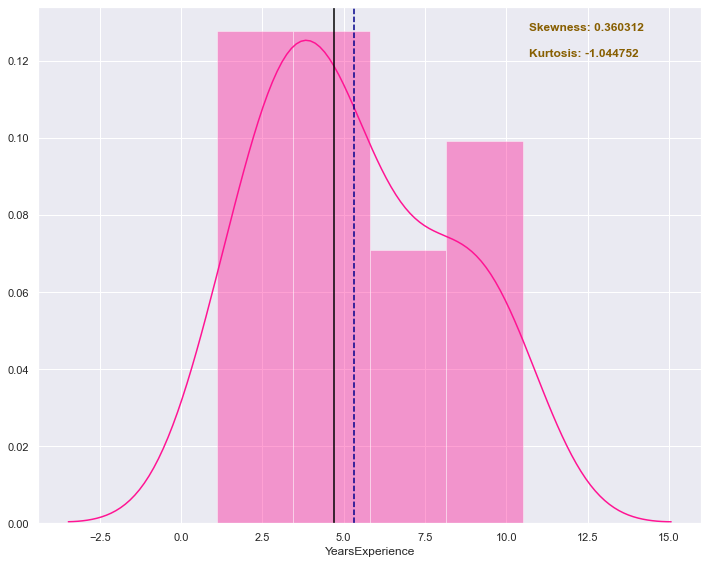

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.distplot(y, color = "deeppink");
plt.axvline(np.mean(y), color = 'darkblue', linestyle = '--')
plt.axvline(np.median(y), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')   #, backgroundcolor = 'white'
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()
plt.show()

<font size = 3 color = darkblue>From the above plots, we can say that *YearsExperience* and *Salary* data is **fairly** distributed. There is no *outlier* in both the columns as there is no data point outside the *minimum and maximum value*.</font>

#### Build Simple Linear Regression Model

In [19]:
# Converting X to numpy.array
x = np.array(x).reshape(-1, 1)

In [20]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [21]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression()

In [22]:
# Fitting model
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([3.33950999, 9.41515916, 9.96621587, 3.32853358, 3.28391648,
       3.31593103])

In [24]:
# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [0.00010163]
Mean squared error: 0.24
Coefficient of determination: 0.97


In [25]:
predict = regr.predict(x)

In [26]:
predict

array([1.52575899, 2.2231679 , 1.36192583, 1.95079018, 1.58145413,
       3.28391648, 3.64044672, 3.06062774, 4.07696249, 3.33950999,
       3.95225822, 3.1977313 , 3.31593103, 3.32853358, 3.73811649,
       4.43196822, 4.23794992, 5.97171538, 5.79639763, 7.07464186,
       6.85084494, 7.51501971, 7.8228675 , 9.09430228, 8.64904603,
       8.25785878, 9.41515916, 8.97467968, 9.96621587, 9.9134681 ])

In [27]:
score = r2_score(y_test, y_pred)
score

0.9724053802235701

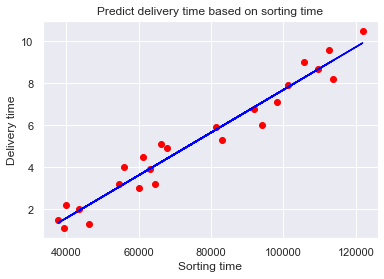

In [28]:
#visualize the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = "blue")
plt.title("Predict delivery time based on sorting time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

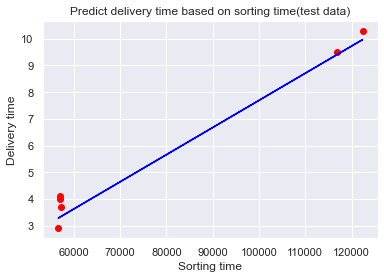

In [29]:
#visualize test results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regr.predict(X_test), color = "blue")
plt.title("Predict delivery time based on sorting time(test data)")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()